## 1. Load Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('http://neueda.conygre.com/pydata/ml_fc/mnist8x8.csv')
print(df.shape)
df.head()

(1797, 65)


pix0  pix1  pix2  pix3  pix4  pix5  pix6  pix7  pix8  pix9  ...  pix55  \
0   0.0   0.0   5.0  13.0   9.0   1.0   0.0   0.0   0.0   0.0  ...    0.0   
1   0.0   0.0   0.0  12.0  13.0   5.0   0.0   0.0   0.0   0.0  ...    0.0   
2   0.0   0.0   0.0   4.0  15.0  12.0   0.0   0.0   0.0   0.0  ...    0.0   
3   0.0   0.0   7.0  15.0  13.0   1.0   0.0   0.0   0.0   8.0  ...    0.0   
4   0.0   0.0   0.0   1.0  11.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   

   pix56  pix57  pix58  pix59  pix60  pix61  pix62  pix63  label  
0    0.0    0.0    6.0   13.0   10.0    0.0    0.0    0.0      0  
1    0.0    0.0    0.0   11.0   16.0   10.0    0.0    0.0      1  
2    0.0    0.0    0.0    3.0   11.0   16.0    9.0    0.0      2  
3    0.0    0.0    7.0   13.0   13.0    9.0    0.0    0.0      3  
4    0.0    0.0    0.0    2.0   16.0    4.0    0.0    0.0      4  

[5 rows x 65 columns]

## 2. Analyse/Shape/Clean Data

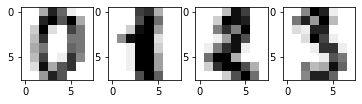

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 4)

for i in range(4):
    data = df.iloc[i, :-1].to_numpy()
    axes[i].imshow( np.reshape(data, (8, 8)), cmap=plt.cm.gray_r )

## 3. Select independent and dependent variables

In [4]:
X = df.iloc[:, :-1]

y = df['label']

## 4. Train-test split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## 5. Select, configure and train model

In [6]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(50, 32), max_iter=500)

model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 32), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## 6. Verification with a confusion matrix

Confusion matrix:
 [[11  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  1  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0]
 [ 0  1  0  0  0  0 24  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0  0 23  0]
 [ 0  0  0  1  0  0  0  0  0 23]]
Accuracy: 0.9833333333333333


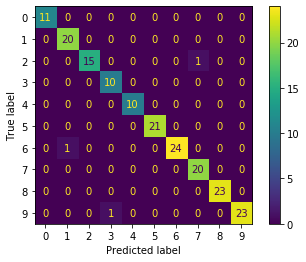

In [7]:
from sklearn import metrics

disp = metrics.plot_confusion_matrix(model, X_test, y_test)

print("Confusion matrix:\n", disp.confusion_matrix)
cmatrix = disp.confusion_matrix

correct = 0
for i in range(len(cmatrix)):
    correct += cmatrix[i][i]

print('Accuracy:', correct / cmatrix.sum())

plt.show()

# Repeat the same analysis with keras & tensorflow

**Install the libraries with:**
```pip install tensorflow keras```

In [9]:
import tensorflow as tf
#from keras.models import Sequential
#from keras.layers import Dense, Activation
from sklearn.preprocessing import OneHotEncoder

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(50, input_dim=64, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(32, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(10, kernel_initializer='normal', activation='softmax'))

# Use a one hot encoder to convert a list of labels
# e.g. [4, 3, 8]
# to a list of arrays of 0s and 1s
# e.g. [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
#       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_y = one_hot_encoder.fit_transform(y_train.values.reshape(-1, 1))

# the one_hot_encoded data is what is output by the output layer of the neural network

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, one_hot_y, epochs=100, batch_size=5, verbose=0)

In [10]:
predicted = model.predict_classes(X_test)
predicted

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 4,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 8, 4, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 7, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7], dtype=int64)

In [11]:
from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(y_test, predicted)

print(cmatrix)

correct = 0
for i in range(len(cmatrix)):
    correct += cmatrix[i][i]
    
print('Accuracy:', correct / cmatrix.sum())

[[11  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0]
 [ 0  0  0  0  2  0  0 18  0  0]
 [ 0  0  0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  1  0  1  0 22]]
Accuracy: 0.9777777777777777
